1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

In [9]:
x1 = np.random.normal(0,1,1000)
x2 = x1 + np.random.normal(0,3,1000)
x3 = 2*x1 + x2
df = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3})
df

,x1,x2,x3
0,-0.801572,-2.336046,-3.939189
1,0.449406,-0.031147,0.867666
2,0.136915,-4.111770,-3.837940
3,1.217657,2.239539,4.674854
4,-1.260804,-3.034658,-5.556267
5,1.030032,1.488293,3.548357
6,-0.784855,-2.946669,-4.516378
7,0.141992,-3.169882,-2.885898
8,2.150490,1.567693,5.868674
9,1.496716,0.185619,3.179051


In [32]:
l, V = la.eig(np.cov(df, rowvar=False))
cov=np.cov(df,rowvar=False)
print(np.cov(df,rowvar=False).shape)
print("eigenvalues:",l)
print(V.shape)
print("covariance matrix:",np.cov(df,rowvar=False))
print("covariance matrix with eigendecomposition:",np.dot(V,np.dot(np.diag(l), la.inv(V))),'\n')

(3, 3)
eigenvalues: [ 2.78552878e+01+0.j -5.02820397e-16+0.j  2.03174578e+00+0.j]
(3, 3)
covariance matrix: [[ 1.00565392  1.0138805   3.02518834]
 [ 1.0138805  10.401621   12.429382  ]
 [ 3.02518834 12.429382   18.47975867]]
covariance matrix with eigendecomposition: [[ 1.00565392+0.j  1.0138805 +0.j  3.02518834+0.j]
 [ 1.0138805 +0.j 10.401621  +0.j 12.429382  +0.j]
 [ 3.02518834+0.j 12.429382  +0.j 18.47975867+0.j]] 



In [29]:
U, spectrum, Vt = la.svd(df.T,full_matrices=False)
n = 1000
l_svd = spectrum**2/(n-1)
print(U.shape, np.diag(spectrum).shape,Vt.shape)
X=np.dot(U,np.dot(np.diag(spectrum), Vt))
print(X,'\n')
print("covariance with SVD:", np.dot(X,X.T)/(n-1),'\n')
print("spectrum:",spectrum,'\n')
print("EIGENVALUES:")
print ("eigendecomposition:",l)
print ("SVD:",l_svd,'\n')
print("EIGENVECTORS:")
print ("eigendecomposition:",V)
print ("SVD:",U)

(3, 3) (3, 3) (3, 1000)
[[-0.80157166  0.44940626  0.13691531 ...  0.68062813  0.18985364
  -0.45989037]
 [-2.33604575 -0.03114654 -4.11177034 ...  3.86621868 -0.36095534
   4.32927488]
 [-3.93918906  0.86766597 -3.83793972 ...  5.22747493  0.01875194
   3.40949413]] 

covariance with SVD: [[ 1.00600479  1.01395439  3.02596397]
 [ 1.01395439 10.40163656 12.42954535]
 [ 3.02596397 12.42954535 18.48147328]] 

spectrum: [1.66819840e+02 4.50595873e+01 8.75961291e-15] 

EIGENVALUES:
eigendecomposition: [ 2.78552878e+01+0.j -5.02820397e-16+0.j  2.03174578e+00+0.j]
SVD: [2.78567158e+01 2.03239880e+00 7.68076260e-32] 

EIGENVECTORS:
eigendecomposition: [[-0.11277094 -0.81649658  0.56622968]
 [-0.58071596 -0.40824829 -0.70434531]
 [-0.80625783  0.40824829  0.42811405]]
SVD: [[-0.11279211  0.56622546 -0.81649658]
 [-0.58068962 -0.70436702 -0.40824829]
 [-0.80627384  0.4280839   0.40824829]]


In [56]:
print ("cov.trace():", cov.trace())
Lambda=np.diag(l)
print ("Lambda.trace():", Lambda.trace())
print("eigenvalues:",l)#not ordered
print("singular values:",spectrum)#ordered
thresold=0.99
i=0
variability=0
while variability<thresold:
    variability += spectrum[i]/spectrum.sum()
    i +=1
print("number of eigenvalues to keep the",thresold,"% of the total variability:",i)
print("weigths of first + second eigenvalues:",variability)
#print (spectrum[0]/spectrum.sum())
#print (l[0]/l.sum())
#print (spectrum[1]/spectrum.sum())
#print (l[2]/l.sum())



cov.trace(): 29.88703358877177
Lambda.trace(): (29.887033588771757+0j)
eigenvalues: [ 2.78552878e+01+0.j -5.02820397e-16+0.j  2.03174578e+00+0.j]
singular values: [1.66819840e+02 4.50595873e+01 8.75961291e-15]
number of eigenvalues to keep the 0.99 % of the total variability: 2
weigths of first + second eigenvalues: 1.0
0.7873338256914371
(0.9320191555437939+0j)
0.2126661743085629
(0.06798084445620607+0j)


In [61]:
df_rotated=np.dot(df,U)
#print(df_rotated)
df_rotated=pd.DataFrame(df_rotated)
df_rotated

[[ 4.62299357e+00 -4.94740122e-01 -2.34433919e-16]
 [-7.32179381e-01  6.47837694e-01 -1.00362490e-16]
 [ 5.46664978e+00  1.33076015e+00 -6.82374566e-16]
 ...
 [-6.53661882e+00 -1.00050094e-01  3.70694011e-16]
 [ 1.73069832e-01  3.69772405e-01 -9.35284779e-17]
 [-5.21107890e+00 -1.85025054e+00  9.71399334e-16]]


,0,1,2
0,4.622994,-0.494740,-2.344339e-16
1,-0.732179,0.647838,-1.003625e-16
2,5.466650,1.330760,-6.823746e-16
3,-5.207031,1.113241,-1.132797e-16
4,6.384276,-0.954935,-5.604407e-16
5,-3.841363,1.053921,5.303820e-17
6,5.441063,-0.302257,-3.494951e-16
7,4.151526,1.077754,-5.171673e-16
8,-5.884660,2.625716,-2.031215e-16
9,-2.839791,2.077635,-1.681577e-16


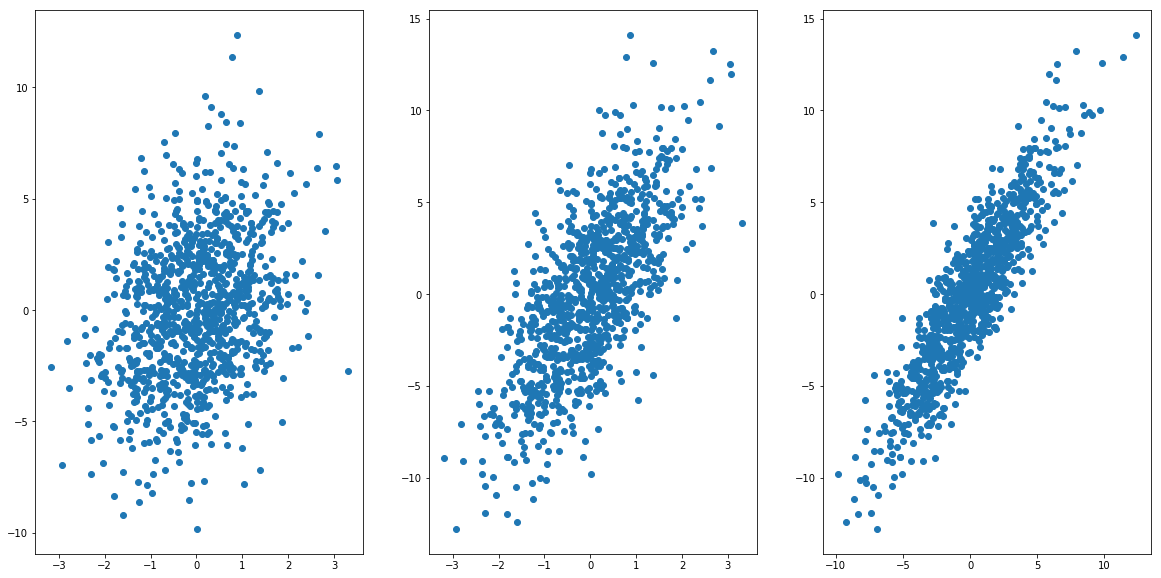

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(df.iloc[:,0],df.iloc[:,1])
ax2.scatter(df.iloc[:,0],df.iloc[:,2])
ax3.scatter(df.iloc[:,1],df.iloc[:,2])

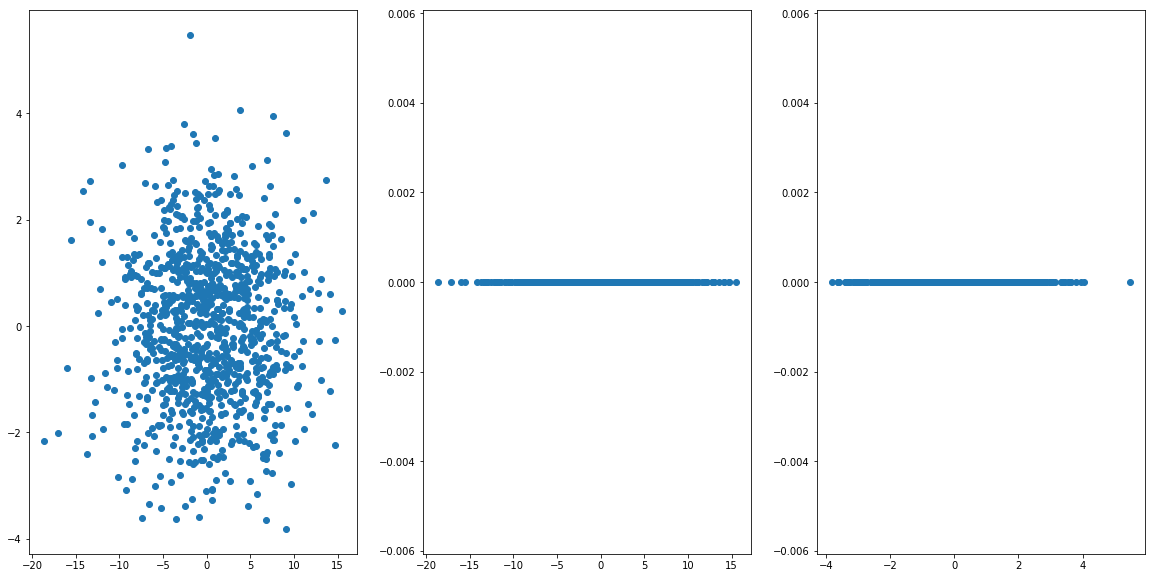

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,1])
ax2.scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,2])
ax3.scatter(df_rotated.iloc[:,1],df_rotated.iloc[:,2])

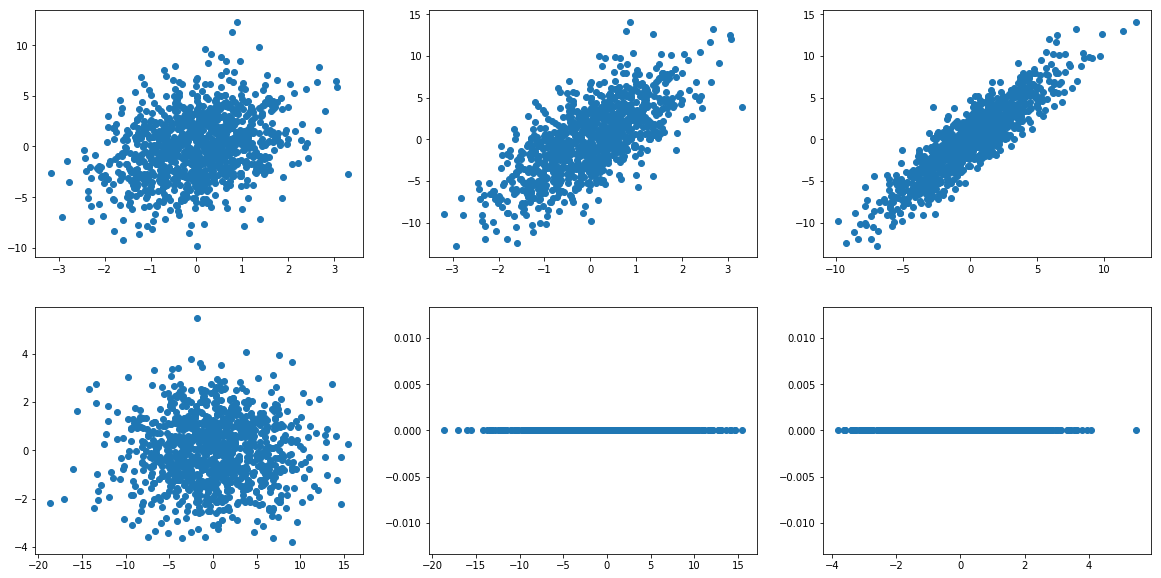

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(df.iloc[:,0],df.iloc[:,1])
ax[0,1].scatter(df.iloc[:,0],df.iloc[:,2])
ax[0,2].scatter(df.iloc[:,1],df.iloc[:,2])
ax[1,0].scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,1])
ax[1,1].scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,2])
ax[1,2].scatter(df_rotated.iloc[:,1],df_rotated.iloc[:,2])

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [78]:
noise1=np.zeros((1000))
noise2=np.zeros((1000))

for i in range(10):
    sd1=np.random.uniform(0.01,0.03)
    sd2=np.random.uniform(0.01,0.06)
    noise1 = noise1 + np.random.normal(0,sd1,1000)
    noise2 = noise2 + np.random.normal(0,sd2,1000)
    #print(s1)
    
x1 = np.random.normal(0,1,1000) + noise1
x2 = x1 + np.random.normal(0,3,1000) + noise2
#print(x1.shape)
x3 = 2*x1 + x2
df2 = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3})
df2

,x1,x2,x3
0,0.304017,2.822588,3.430623
1,-1.567865,-9.216852,-12.352582
2,-0.089338,1.699209,1.520534
3,-0.702807,0.230160,-1.175453
4,1.012672,3.010668,5.036012
5,0.539789,-0.072461,1.007118
6,-0.616942,0.102000,-1.131885
7,0.295785,-0.937593,-0.346023
8,0.277987,2.455565,3.011539
9,-0.737216,-5.544335,-7.018766


In [80]:
cov2=np.cov(df2,rowvar=False)
l2, V2 = la.eig(cov2)
print("covariance matrix:",cov2,'\n')
print("covariance matrix shape:",cov2.shape,'\n')
print("eigenvalues:",l2,'\n')
print("eigenvectors:",V2,'\n')
print("eigenvectors shape:",V2.shape,'\n')
print("covariance matrix with eigendecomposition:",np.dot(V2,np.dot(np.diag(l2), la.inv(V2))),'\n')

covariance matrix: [[ 1.04395694  1.01696713  3.10488101]
 [ 1.01696713 10.3777265  12.41166076]
 [ 3.10488101 12.41166076 18.62142278]] 

covariance matrix shape: (3, 3) 

eigenvalues: [2.79385571e+01+0.j 1.04894251e-15+0.j 2.10454908e+00+0.j] 

eigenvectors: [[-0.11513218 -0.81649658  0.56575429]
 [-0.57777249 -0.40824829 -0.70676183]
 [-0.80803684  0.40824829  0.42474675]] 

eigenvectors shape: (3, 3) 

covariance matrix with eigendecomposition: [[ 1.04395694+0.j  1.01696713+0.j  3.10488101+0.j]
 [ 1.01696713+0.j 10.3777265 +0.j 12.41166076+0.j]
 [ 3.10488101+0.j 12.41166076+0.j 18.62142278+0.j]] 



In [81]:
U2, spectrum2, Vt2 = la.svd(df2.T,full_matrices=False)
n = 1000
l2_svd = spectrum2**2/(n-1)
print(U2.shape, np.diag(spectrum2).shape,Vt2.shape)
X2=np.dot(U2,np.dot(np.diag(spectrum2), Vt2))
#print(X,'\n')
print("covariance matrix with SVD:", np.dot(X2,X2.T)/(n-1),'\n')
print("spectrum:",spectrum2,'\n')
print("EIGENVALUES:")
print ("eigendecomposition:",l2)
print ("SVD:",l2_svd,'\n')
print("EIGENVECTORS:")
print ("eigendecomposition:",V2)
print ("SVD:",U2)

(3, 3) (3, 3) (3, 1000)
covariance with SVD: [[ 1.0444837   1.0196051   3.10857251]
 [ 1.0196051  10.39093716 12.43014736]
 [ 3.10857251 12.43014736 18.64729237]] 

spectrum: [1.67183091e+02 4.58524213e+01 3.09676954e-14] 

EIGENVALUES:
eigendecomposition: [2.79385571e+01+0.j 1.04894251e-15+0.j 2.10454908e+00+0.j]
SVD: [2.79781642e+01 2.10454909e+00 9.59958115e-31] 

EIGENVECTORS:
eigendecomposition: [[-0.11513218 -0.81649658  0.56575429]
 [-0.57777249 -0.40824829 -0.70676183]
 [-0.80803684  0.40824829  0.42474675]]
SVD: [[-0.11513247  0.56575423 -0.81649658]
 [-0.57777212 -0.70676213 -0.40824829]
 [-0.80803706  0.42474632  0.40824829]]


In [82]:
df2_rotated=np.dot(df2,U2)
#print(df_rotated)
df2_rotated=pd.DataFrame(df2_rotated)
df2_rotated

,0,1,2
0,-4.437886,-0.365755,1.033194e-15
1,15.487096,0.380382,-2.599327e-15
2,-2.200117,-0.605639,7.730565e-16
3,0.897746,-1.059554,4.990662e-16
4,-5.925355,0.584125,6.931084e-16
5,-0.834070,0.784370,-2.626511e-16
6,0.926703,-0.901891,4.763739e-16
7,0.787260,0.683025,-5.336096e-16
8,-3.884197,-0.299088,7.121486e-16
9,8.959663,0.520248,-1.902768e-15


In [88]:
print ("cov2.trace():", cov2.trace(),'\n')
Lambda2=np.diag(l2)
print ("Lambda2.trace():", Lambda2.trace(),'\n')
print("eigenvalues:",l2,'\n')#not ordered
print("singular values:",spectrum2,'\n')#ordered
thresold=0.99
i=0
variability=0
#print(spectrum[0]**2)
while variability<thresold:
    variability += spectrum2[i]**2/(spectrum2**2).sum() #ad essere precisi dovrebbe essere questa la formula
    #variability += spectrum2[i]/spectrum2.sum()
    i +=1
print("number of eigenvalues to keep the",thresold,"% of the total variability:",i)
print("weigths of first + second eigenvalues:",variability)

cov2.trace(): 30.043106219544043 

Lambda2.trace(): (30.04310621954403+0j) 

eigenvalues: [2.79385571e+01+0.j 1.04894251e-15+0.j 2.10454908e+00+0.j] 

singular values: [1.67183091e+02 4.58524213e+01 3.09676954e-14] 

number of eigenvalues to keep the 0.99 % of the total variability: 2
weigths of first + second eigenvalues: 1.0


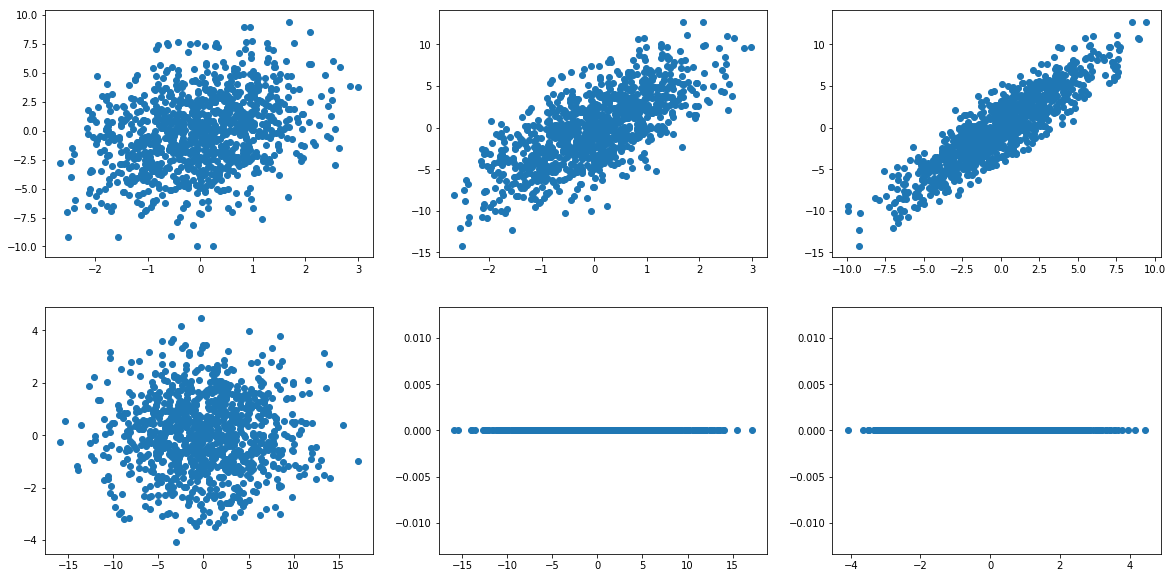

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(df2.iloc[:,0],df2.iloc[:,1])
ax[0,1].scatter(df2.iloc[:,0],df2.iloc[:,2])
ax[0,2].scatter(df2.iloc[:,1],df2.iloc[:,2])
ax[1,0].scatter(df2_rotated.iloc[:,0],df2_rotated.iloc[:,1])
ax[1,1].scatter(df2_rotated.iloc[:,0],df2_rotated.iloc[:,2])
ax[1,2].scatter(df2_rotated.iloc[:,1],df2_rotated.iloc[:,2])

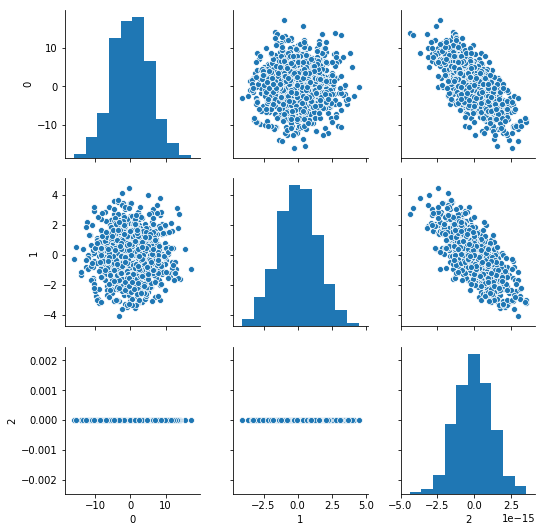

In [92]:
import seaborn as sns
sns.pairplot(df2_rotated)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset